In [1]:
import keras
import tensorflow
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install umap-learn
!pip install scikit-learn


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preparing Data

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, X_train, test_size=0.1, shuffle= True)

# Preparing Model

In [5]:
encoder_model = keras.models.Sequential([

    #Encoder
    keras.layers.InputLayer((28,28,1)),
    keras.layers.Conv2D(64,(3,3), padding="same"),
    keras.layers.Conv2D(128,(3,3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(256,(3,3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    #BottleNeck
    keras.layers.Conv2D(4,(1,1),padding="same",activation="relu"),
    keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.08),
    keras.layers.Dense(49,activation="relu"),
    
    #Decoder
    keras.layers.Dense(49,activation="relu"),
#     keras.layers.Reshape((7,7,1)),
    
#     tf.keras.layers.Conv2DTranspose(32,(5,5)),
#     keras.layers.Conv2D(64,(3,3), padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.ReLU(),
    
#     tf.keras.layers.Conv2DTranspose(64,(4,4)),
#     keras.layers.Conv2D(64,(3,3), padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.ReLU(),
    
#     keras.layers.Conv2D(1,(1,1)),
    
#     keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation='bicubic')
    keras.layers.Dense(784,activation="relu"),
    keras.layers.Reshape((28,28,1)),
    keras.layers.Conv2D(64,(3,3), padding="same",activation="relu"),
    keras.layers.Conv2D(1,(1,1)),
])
def root_mean_squared_error(y_true, y_pred):
        return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_pred - y_true))) 
encoder_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss=root_mean_squared_error)
encoder_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization (Batch  (None, 28, 28, 128)       512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       2

# Training

In [6]:
encoder_model.fit(x_train,y_train,batch_size = 256, epochs = 100,validation_data=(x_valid,y_valid))

Epoch 1/100
211/211 [==============================] - 18s 31ms/step - loss: 0.2084 - val_loss: 0.3296
Epoch 2/100
211/211 [==============================] - 5s 26ms/step - loss: 0.1528 - val_loss: 0.2178
Epoch 3/100
211/211 [==============================] - 5s 26ms/step - loss: 0.1381 - val_loss: 0.1349
Epoch 4/100
211/211 [==============================] - 5s 26ms/step - loss: 0.1300 - val_loss: 0.1177
Epoch 5/100
211/211 [==============================] - 5s 25ms/step - loss: 0.1242 - val_loss: 0.1108
Epoch 6/100
211/211 [==============================] - 5s 26ms/step - loss: 0.1201 - val_loss: 0.1077
Epoch 7/100
211/211 [==============================] - 5s 25ms/step - loss: 0.1168 - val_loss: 0.1040
Epoch 8/100
211/211 [==============================] - 5s 25ms/step - loss: 0.1140 - val_loss: 0.1026
Epoch 9/100
211/211 [==============================] - 5s 26ms/step - loss: 0.1122 - val_loss: 0.0990
Epoch 10/100
211/211 [==============================] - 5s 25ms/step - loss: 0.11

# Visualising Data

In [7]:
y_pred=encoder_model.predict(X_train)

1875/1875 [==============================] - 4s 2ms/step


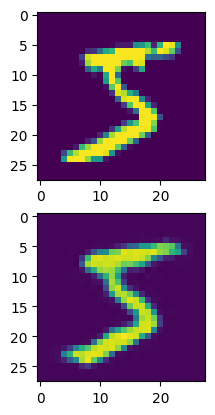

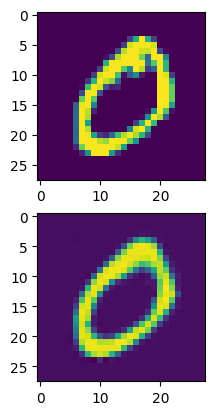

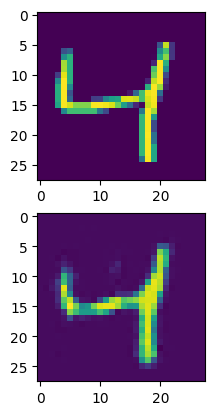

In [8]:
for i in range(3):
    fig,axs=plt.subplots(2,1)
    axs[0].imshow(X_train[i])
    axs[1].imshow(y_pred[i])
    plt.show()


313/313 [==============================] - 1s 2ms/step


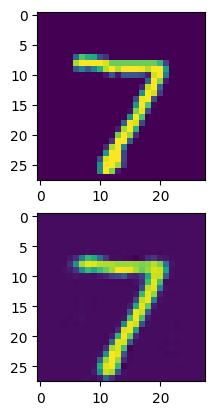

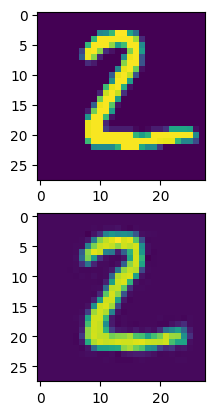

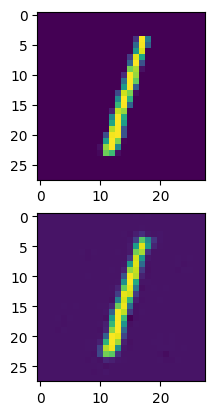

In [9]:
y_pred_test=encoder_model.predict(X_test)
for i in range(3):
    fig,axs=plt.subplots(2,1)
    axs[0].imshow(X_test[i])
    axs[1].imshow(y_pred_test[i])
    plt.show()

In [10]:
embedding_model = keras.Model(encoder_model.input,encoder_model.layers[12].output)
embedding_model.trainable  = False
embedding_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization (Batch  (None, 28, 28, 128)       512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                          

In [11]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def watch(data,labels):
    data=pd.DataFrame(embedding_model.predict(data))
    reducer = umap.UMAP()
    sd=StandardScaler()
    data.loc[:,:] = sd.fit_transform(data)
    result=reducer.fit_transform(data)
    result=pd.DataFrame(result)
    result["labels"] = labels
    sns.scatterplot(data=result,x=0,y=1,hue="labels")
    return result

1875/1875 [==============================] - 3s 1ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

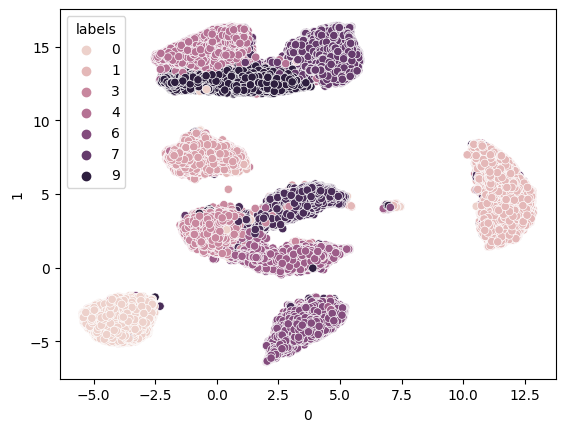

In [12]:
result=watch(X_train,Y_train)

313/313 [==============================] - 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,0,1,labels
0,4.781197,-1.700578,7
1,-0.203420,4.639978,2
2,11.781813,4.255293,1
3,-2.878430,10.912523,0
4,-0.112554,-2.747002,4
...,...,...,...
9995,-0.972726,5.000391,2
9996,0.501980,9.724023,3
9997,0.936247,-0.712049,4
9998,4.268303,11.290348,5


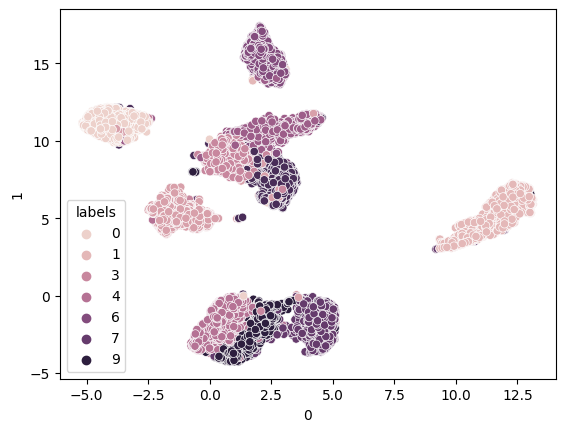

In [13]:
watch(X_test,Y_test)